# 패키지

In [1]:
# 데이터 핸들링
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# sampling
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

# modeling
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.utils import all_estimators

# performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.inspection import permutation_importance
pd.set_option('mode.chained_assignment',  None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\asahi\\OneDrive\\바탕 화면\\대학원\\기계학습특론\\기말과제\\종합'

In [4]:
random_state = 42

In [5]:
# row display condition
pd.set_option('display.max_rows', 500)

# 1. Data Read

In [6]:
df = pd.read_csv("./Perovskite_database_content_all_data.csv")
df.head()
print(df.shape)

(42443, 410)


In [7]:
target = df['Stability_PCE_T80']
target_notnull = df[~df['Stability_PCE_T80'].isnull()]['Stability_PCE_T80']

### basic preprocessing

In [8]:
def remove_single_value_col(df):
    single_col = []
    for i in df.columns:
        if (df[i].nunique() == 1)|(df[i].nunique() == 0):
            single_col.append(i)
    df_new = df.drop(columns=single_col, axis=1)
    return df_new

In [9]:
# 전반적으로 null이 압도적이어도 target값이 존재할때 함께 존재하는 비율이 높으면 제거하지 않기 위함
def remove_num_n_col_with_target(df,n):
    del_col = []
    df_target_notnull = df[~df['Stability_PCE_T80'].isnull()]
    for col in df.columns:
        if df_target_notnull[col].isnull().sum()/len(df_target_notnull)*100 > int(n):
            del_col.append(col)
    df_new = df.drop(columns = del_col, axis=1)
    return df_new

In [10]:
df_single_drop = remove_single_value_col(df)
print('단일값 제거 전 :', df.shape)
print('단일값 제거 후 :', df_single_drop.shape)

단일값 제거 전 : (42443, 410)
단일값 제거 후 : (42443, 319)


## 1.1 Object type

In [11]:
bool_col = [] 
num_col = []  # int+float
O_col = []
for i in df_single_drop.columns:
    if df_single_drop[i].dtype == 'bool':
        bool_col.append(i)
    elif df_single_drop[i].dtype == 'int64':
        num_col.append(i)
    elif df_single_drop[i].dtype == 'float64':
        num_col.append(i)
    elif df_single_drop[i].dtype == 'O':
        O_col.append(i)
df_bool = df_single_drop[bool_col]
df_num = df_single_drop[num_col]
df_O = df_single_drop[O_col]

In [12]:
df_bool.shape

(42443, 36)

In [13]:
df_num.shape

(42443, 84)

In [14]:
df_O.shape

(42443, 199)

###  unknown 이 80% 이상인 columns 제거

In [15]:
unknown_col = ['Substrate_deposition_procedure'
,'ETL_additives_compounds'
,'ETL_deposition_aggregation_state_of_reactants'
,'ETL_deposition_synthesis_atmosphere'
,'ETL_deposition_solvents'
,'ETL_deposition_solvents_supplier'
,'ETL_deposition_solvents_purity'
,'ETL_deposition_reaction_solutions_compounds_supplier'
,'ETL_deposition_reaction_solutions_compounds_purity'
,'ETL_deposition_reaction_solutions_volumes'
,'ETL_deposition_reaction_solutions_age'
,'ETL_deposition_reaction_solutions_temperature'
,'ETL_deposition_substrate_temperature'
,'ETL_deposition_thermal_annealing_temperature'
,'ETL_deposition_thermal_annealing_time'
,'ETL_deposition_thermal_annealing_atmosphere'
,'ETL_storage_atmosphere'
,'Perovskite_deposition_solvents_supplier'
,'Perovskite_deposition_solvents_purity'
,'Perovskite_deposition_reaction_solutions_compounds_supplier'
,'Perovskite_deposition_reaction_solutions_compounds_purity'
,'Perovskite_deposition_reaction_solutions_volumes'
,'Perovskite_deposition_reaction_solutions_age'
,'Perovskite_deposition_reaction_solutions_temperature'
,'Perovskite_deposition_substrate_temperature'
,'Perovskite_deposition_quenching_media_volume'
,'Perovskite_deposition_thermal_annealing_atmosphere'
,'Perovskite_deposition_solvent_annealing_solvent_atmosphere'
,'Perovskite_deposition_solvent_annealing_time'
,'Perovskite_deposition_solvent_annealing_temperature'
,'Perovskite_storage_time_until_next_deposition_step'
,'Perovskite_storage_atmosphere'
,'HTL_deposition_aggregation_state_of_reactants'
,'HTL_deposition_synthesis_atmosphere'
,'HTL_deposition_solvents'
,'HTL_deposition_solvents_supplier'
,'HTL_deposition_solvents_purity'
,'HTL_deposition_reaction_solutions_compounds_supplier'
,'HTL_deposition_reaction_solutions_compounds_purity'
,'HTL_deposition_reaction_solutions_volumes'
,'HTL_deposition_reaction_solutions_age'
,'HTL_deposition_reaction_solutions_temperature'
,'HTL_deposition_substrate_temperature'
,'HTL_deposition_thermal_annealing_temperature'
,'HTL_deposition_thermal_annealing_time'
,'HTL_deposition_thermal_annealing_atmosphere'
,'HTL_storage_time_until_next_deposition_step'
,'HTL_storage_atmosphere'
,'Backcontact_deposition_aggregation_state_of_reactants'
,'Backcontact_deposition_synthesis_atmosphere'
,'Backcontact_deposition_solvents'
,'Backcontact_deposition_solvents_supplier'
,'Backcontact_deposition_reaction_solutions_compounds_supplier'
,'Backcontact_deposition_reaction_solutions_compounds_purity'
,'Backcontact_deposition_reaction_solutions_volumes'
,'Backcontact_deposition_reaction_solutions_temperature'
,'Backcontact_deposition_substrate_temperature'
,'Backcontact_deposition_thermal_annealing_temperature'
,'Backcontact_deposition_thermal_annealing_time'
,'Backcontact_deposition_thermal_annealing_atmosphere'
,'Backcontact_storage_time_until_next_deposition_step'
,'Backcontact_storage_atmosphere'
,'Add_lay_front_stack_sequence'
,'Add_lay_front_deposition_procedure'
,'Add_lay_back_stack_sequence'
,'Add_lay_back_deposition_procedure'
,'Encapsulation_stack_sequence'
,'Encapsulation_edge_sealing_materials'
,'Encapsulation_atmosphere_for_encapsulation'
,'JV_storage_age_of_cell'
,'JV_storage_atmosphere'
,'JV_light_wavelength_range'
,'Stability_light_wavelength_range'
,'Stability_light_cycling_times'
,'Stability_potential_bias_range'
,'Stability_temperature_range'
,'Stability_temperature_cycling_times'
,'Stability_atmosphere'
,'Stability_relative_humidity_range'
,'Stability_periodic_JV_measurements_time_between_jv'
,'Outdoor_time_end'
,'Outdoor_temperature_range']

In [16]:
df_O_unknown_drop = df_O.drop(columns=unknown_col, axis=1)
print("unknown 제거 컬럼 개수 :", df_O.shape[1] - df_O_unknown_drop.shape[1])

unknown 제거 컬럼 개수 : 82


### remove Ref col

In [17]:
Ref_col = ['Ref_name_of_person_entering_the_data'
,'Ref_DOI_number'
,'Ref_lead_author'
,'Ref_publication_date'
,'Ref_journal'
,'Ref_original_filename_data_upload'
,'Ref_internal_sample_id']

In [18]:
df_O_Ref_drop = df_O_unknown_drop.drop(columns=Ref_col, axis=1)
df_O_Ref_drop.shape

(42443, 110)

### remove single value col

In [19]:
single_col = ['JV_light_spectra'
,'JV_default_Voc_scan_direction'
,'JV_default_Jsc_scan_direction'
,'JV_default_FF_scan_direction']

In [20]:
df_O_sigle_drop = df_O_Ref_drop.drop(columns=single_col, axis=1)
df_O_sigle_drop.shape

(42443, 106)

### remove missing value col

In [21]:
missing_col = ['Perovskite_additives_concentrations'
,'Perovskite_deposition_solvents_mixing_ratios'
,'Perovskite_deposition_thermal_annealing_temperature']

In [22]:
df_O_missing_drop = df_O_sigle_drop.drop(columns=missing_col, axis=1)
df_O_missing_drop.shape

(42443, 103)

In [23]:
df_O_with_target = pd.concat([df_O_missing_drop, target], axis=1)

In [24]:
df_O_notnull = remove_num_n_col_with_target(df_O_with_target, 80)
print('제거 전 :', df_O_with_target.shape)
print('제거 후 :', df_O_notnull.shape)

제거 전 : (42443, 104)
제거 후 : (42443, 39)


In [25]:
df_O_final = df_O_notnull[~df_O_notnull['Stability_PCE_T80'].isnull()]
df_O_final.shape

(1834, 39)

In [26]:
for i in df_O_final.columns:
    print(i)

Cell_stack_sequence
Cell_architecture
Substrate_stack_sequence
ETL_stack_sequence
ETL_thickness
ETL_deposition_procedure
Perovskite_dimension_list_of_layers
Perovskite_composition_a_ions
Perovskite_composition_a_ions_coefficients
Perovskite_composition_b_ions
Perovskite_composition_b_ions_coefficients
Perovskite_composition_c_ions
Perovskite_composition_c_ions_coefficients
Perovskite_composition_short_form
Perovskite_composition_long_form
Perovskite_additives_compounds
Perovskite_thickness
Perovskite_band_gap
Perovskite_band_gap_estimation_basis
Perovskite_pl_max
Perovskite_deposition_procedure
Perovskite_deposition_aggregation_state_of_reactants
Perovskite_deposition_synthesis_atmosphere
Perovskite_deposition_solvents
Perovskite_deposition_quenching_media
Perovskite_deposition_thermal_annealing_time
HTL_stack_sequence
HTL_thickness_list
HTL_additives_compounds
HTL_deposition_procedure
Backcontact_stack_sequence
Backcontact_thickness_list
Backcontact_deposition_procedure
JV_test_atmosp

## 1.2 Bool type

In [27]:
df_bool.isnull().sum()

Ref_data_entered_by_author                                 0
Ref_part_of_initial_dataset                                0
Cell_flexible                                              0
Cell_semitransparent                                       0
Module                                                     0
Module_JV_data_recalculated_per_cell                       0
Perovskite_single_crystal                                  0
Perovskite_dimension_0D                                    0
Perovskite_dimension_2D                                    0
Perovskite_dimension_2D3D_mixture                          0
Perovskite_dimension_3D                                    0
Perovskite_dimension_3D_with_2D_capping_layer              0
Perovskite_composition_perovskite_ABC3_structure           0
Perovskite_composition_perovskite_inspired_structure       0
Perovskite_composition_inorganic                           0
Perovskite_composition_leadfree                            0
Perovskite_band_gap_grad

In [28]:
df_bool_with_target = pd.concat([df_bool, target], axis=1)
df_bool_with_target_notnull = df_bool_with_target[~df_bool_with_target.Stability_PCE_T80.isnull()]
df_bool_with_target_notnull.shape

(1834, 37)

In [29]:
# bool data 중 n% 이상 T/F 일 경우 drop
def remove_imbalanced_bool_col(df,n):
    del_col = []
    df_target_notnull = df[~df['Stability_PCE_T80'].isnull()]
    for col in df.columns:
        if len(df_target_notnull[col].value_counts())==1:
            del_col.append(col)
        else:
            if df_target_notnull[col].value_counts(normalize=True)[0]*100 > int(n):
                del_col.append(col)
            elif df_target_notnull[col].value_counts(normalize=True)[1]*100 > int(n):
                del_col.append(col)
    df_new = df.drop(columns = del_col, axis=1)
    return df_new

In [30]:
df_bool_final = remove_imbalanced_bool_col(df_bool_with_target_notnull, 95)
print('제거 전 :', df_bool_with_target_notnull.shape)
print('제거 후 :', df_bool_final.shape)

제거 전 : (1834, 37)
제거 후 : (1834, 9)


In [31]:
df_bool_final

,Perovskite_composition_inorganic,Perovskite_deposition_quenching_induced_crystallisation,Encapsulation,JV_measured,Stabilised_performance_measured,EQE_measured,Stability_periodic_JV_measurements,Stability_PCE_burn_in_observed,Stability_PCE_T80
25,False,True,False,True,False,True,False,False,220.0
26,False,True,False,True,False,True,False,False,350.0
27,False,True,False,True,False,True,False,False,200.0
45,False,True,False,True,False,False,False,False,150.0
59,False,True,False,True,False,False,False,False,450.0
...,...,...,...,...,...,...,...,...,...
42321,False,True,False,True,False,True,False,False,500.0
42322,False,True,False,True,False,True,False,False,500.0
42392,False,True,False,True,False,False,False,False,72.0
42425,False,False,False,True,False,False,False,False,40.0


In [32]:
df_O_final.shape

(1834, 39)

In [33]:
df_category = pd.concat([df_O_final.drop('Stability_PCE_T80', axis=1),
                         df_bool_final.drop('Stability_PCE_T80', axis=1),
                         target_notnull], axis=1)
print(df_category.shape)
df_category.head()

(1834, 47)


,Cell_stack_sequence,Cell_architecture,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_list_of_layers,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,...,Stability_potential_bias_load_condition,Perovskite_composition_inorganic,Perovskite_deposition_quenching_induced_crystallisation,Encapsulation,JV_measured,Stabilised_performance_measured,EQE_measured,Stability_periodic_JV_measurements,Stability_PCE_burn_in_observed,Stability_PCE_T80
25,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,TiO2-c,80.0,CBD,3.0,MA,1,Pb,...,Open circuit,False,True,False,True,False,True,False,False,220.0
26,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,TiO2-c,80.0,CBD,3.0,MA,1,Pb,...,Open circuit,False,True,False,True,False,True,False,False,350.0
27,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,TiO2-c,NaN,Spin-coating,3.0,Cs; FA; MA,0.05; 0.788; 0.162,Pb,...,MPPT,False,True,False,True,False,True,False,False,200.0
45,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,SnO2-c,25.0,CBD,3.0,Cs; FA; MA,0.05; 0.827; 0.123,Pb,...,MPPT,False,True,False,True,False,False,False,False,150.0
59,SLG | FTO | LiMgNiO-c | Perovskite | PCBM-60 |...,pin,SLG | FTO,PCBM-60 | Carbon-QDs,150.0 | 10.0,Spin-coating | Spin-coating,3.0,MA,1,Pb,...,Open circuit,False,True,False,True,False,False,False,False,450.0


## 1.3 num(int, float) type

In [34]:
df_num.shape

(42443, 84)

In [35]:
df_num.head()

,Ref_ID,Ref_ID_temp,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Module_number_of_cells_in_module,Module_area_total,Module_area_effective,Substrate_area,ETL_storage_time_until_next_deposition_step,...,Stability_flexible_cell_number_of_bending_cycles,Stability_flexible_cell_PCE_initial_value,Stability_flexible_cell_PCE_end_of_experiment,Outdoor_average_over_n_number_of_cells,Outdoor_installation_tilt,Outdoor_time_total_exposure,Outdoor_temperature_tmodule,Outdoor_PCE_initial_value,Outdoor_PCE_end_of_experiment,Outdoor_PCE_T80
0,1,1,NaN,0.2,0,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,0.2,0,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,0.2,0,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,0.2,0,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,0.2,0,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_ex_null80 = remove_num_n_col_with_target(df_num,80)
df_ex_null80.shape

(42443, 32)

In [37]:
null_ratios = []
cat_top1_names = []
cat_top1_ratios = []

for i in df_ex_null80.columns:
#for i in [ 'Outdoor_time_end', 'Outdoor_temperature_range']:
    null_ratio = (df_ex_null80[i].isnull().sum()/df_ex_null80.shape[0])*100
    null_ratios.append(null_ratio)
    unique = df_ex_null80[i].nunique()
    cats = pd.Series(df_ex_null80[i].value_counts()).sort_values(ascending=False)
    cats_index = cats.index
    cats_values = cats.values
    cat_top1_name = cats_index[0]
    cat_top1_ratio = (cats_values[0]/cats_values.sum())*100
    cat_top1_names.append(cat_top1_name)
    cat_top1_ratios.append(cat_top1_ratio)
    cat_top10_ratio = (cats_values[:10].sum()/cats_values.sum())*100
#     print(f'Info about column "{i}""\n')
#     print(f'Null ratio: {null_ratio:.2f}%\n')
#     print('Number of unique categories: ', unique, '\n')
#     print(f'Top 10 categories, which compose {cat_top10_ratio:.2f}% of total data count\n', cats.iloc[:10], '\n')
#     print('='*30)
#     print('\n\n\n')

In [38]:
# null 비율, 최빈 범주의 비율 정리
null_cat_top_ratio = pd.DataFrame(zip(null_ratios, cat_top1_names, cat_top1_ratios), columns=['null_ratio', 'cat_top1_name', 'cat_top1_ratio'], index=df_ex_null80.columns)

In [39]:
# 최빈 범주의 비율이 90% 이상인 컬럼 제거
cat_top_remove = null_cat_top_ratio.loc[null_cat_top_ratio.cat_top1_ratio < 90]
df_num_cat_top_remove = df_ex_null80[cat_top_remove.index]
df_num_cat_top_remove.shape

(42443, 26)

In [40]:
df_num_cat_top_remove.corr()['JV_reverse_scan_FF'].values

array([ 0.01110836,  0.01143752, -0.00433595, -0.0472861 ,  0.04630202,
       -0.01306241,  0.52504545,  0.48319694,  1.        ,  0.7446892 ,
        0.36059373,  0.47585665,  0.70284896,  0.69741714,  0.52495401,
        0.48321547,  1.        ,  0.74977423, -0.04387186,  0.33471474,
        0.02660227, -0.05995911,  0.0022306 ,  0.26349386,  0.05890259,
        0.06231838])

In [41]:
for col in df_num_cat_top_remove.columns:
    print("-"*36)
    print("기준컬럼:", col, "\n")
    for counter_col, cor_val in enumerate(df_num_cat_top_remove.corr()[col].values):
        if (cor_val > 0.7)&(col != df_num_cat_top_remove.columns[counter_col]):
            print("상대컬럼:", df_num_cat_top_remove.columns[counter_col], "상관계수:", cor_val)

------------------------------------
기준컬럼: Ref_ID 

상대컬럼: Ref_ID_temp 상관계수: 0.9945005264599842
------------------------------------
기준컬럼: Ref_ID_temp 

상대컬럼: Ref_ID 상관계수: 0.9945005264599842
------------------------------------
기준컬럼: Cell_area_measured 

------------------------------------
기준컬럼: Perovskite_deposition_number_of_deposition_steps 

------------------------------------
기준컬럼: JV_average_over_n_number_of_cells 

------------------------------------
기준컬럼: JV_scan_speed 

------------------------------------
기준컬럼: JV_reverse_scan_Voc 

상대컬럼: JV_forward_scan_Voc 상관계수: 0.7377197592826223
상대컬럼: JV_default_Voc 상관계수: 1.0
------------------------------------
기준컬럼: JV_reverse_scan_Jsc 

상대컬럼: JV_reverse_scan_PCE 상관계수: 0.7943361090269094
상대컬럼: JV_forward_scan_Jsc 상관계수: 0.9442011282311482
상대컬럼: JV_forward_scan_PCE 상관계수: 0.7411555624961027
상대컬럼: JV_default_Jsc 상관계수: 0.9999999271039899
상대컬럼: JV_default_PCE 상관계수: 0.7998411769806596
상대컬럼: EQE_integrated_Jsc 상관계수: 0.9007842873912641
-------

In [42]:
# 상관계수 0.7 이상인 컬럼은 대표 하나만 남기고 제거
final_col = ['Cell_area_measured'
            ,'Perovskite_deposition_number_of_deposition_steps'
            ,'JV_average_over_n_number_of_cells'
            ,'JV_scan_speed'
            ,'JV_reverse_scan_Voc'
            ,'JV_reverse_scan_Jsc'
            ,'JV_reverse_scan_FF'
            ,'JV_hysteresis_index'
            ,'Stability_light_intensity'
            ,'Stability_relative_humidity_average_value'
            ,'Stability_time_total_exposure'
            ,'Stability_PCE_initial_value'
            ,'Stability_PCE_end_of_experiment'
            ,'Stability_PCE_T80' # target value
            ]
del_col = ['JV_forward_scan_Voc'
          ,'JV_default_Voc'
          ,'JV_reverse_scan_PCE'
          ,'JV_forward_scan_Jsc'
          ,'JV_forward_scan_PCE'
          ,'JV_forward_scan_FF'
          ,'JV_default_Jsc'
          ,'JV_default_PCE'
          ,'JV_default_FF'
          ,'EQE_integrated_Jsc'
          ]
df_num_final = df_num_cat_top_remove[final_col]
df_num_final_taget_not_null = df_num_final[~df_num_final['Stability_PCE_T80'].isnull()]

In [43]:
print("target null 포함 :", df_num_final.shape)
print("target null 미포함:", df_num_final_taget_not_null.shape)

target null 포함 : (42443, 14)
target null 미포함: (1834, 14)


## 1.4 최종 데이터 결합

In [44]:
df_final = pd.concat([df_category.drop('Stability_PCE_T80',axis=1), df_num_final_taget_not_null], axis=1)

additional_drop = ['Cell_semitransparent_wavelength_range', 
                   'Outdoor_location_coordinates',
                   'Outdoor_time_start',
                   'Outdoor_potential_bias_range']
try :
    df_final = df_final.drop(columns=i, axis=1)
except KeyError:
    pass

print(df_final.shape)

valid_col = df_final.columns
df_final.head()

(1834, 60)


,Cell_stack_sequence,Cell_architecture,Substrate_stack_sequence,ETL_stack_sequence,ETL_thickness,ETL_deposition_procedure,Perovskite_dimension_list_of_layers,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,...,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_hysteresis_index,Stability_light_intensity,Stability_relative_humidity_average_value,Stability_time_total_exposure,Stability_PCE_initial_value,Stability_PCE_end_of_experiment,Stability_PCE_T80
25,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,TiO2-c,80.0,CBD,3.0,MA,1,Pb,...,1.06,19.20,0.654,1.011708,0.0,34.0,480.0,NaN,61.0,220.0
26,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,TiO2-c,80.0,CBD,3.0,MA,1,Pb,...,1.10,21.53,0.727,0.408254,0.0,34.0,480.0,NaN,78.0,350.0
27,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,TiO2-c,NaN,Spin-coating,3.0,Cs; FA; MA,0.05; 0.788; 0.162,Pb,...,1.08,22.40,0.763,NaN,100.0,NaN,5.0,NaN,75.0,200.0
45,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,nip,SLG | FTO,SnO2-c,25.0,CBD,3.0,Cs; FA; MA,0.05; 0.827; 0.123,Pb,...,1.11,22.48,0.778,NaN,100.0,NaN,700.0,19.5,69.0,150.0
59,SLG | FTO | LiMgNiO-c | Perovskite | PCBM-60 |...,pin,SLG | FTO,PCBM-60 | Carbon-QDs,150.0 | 10.0,Spin-coating | Spin-coating,3.0,MA,1,Pb,...,1.06,19.40,0.734,NaN,0.0,50.0,500.0,15.0,74.0,450.0


# 2. 전처리

In [45]:
df_processed = df_final.copy()
df_processed.reset_index(inplace=True, drop=True)
df_processed.shape

(1834, 60)

## 2.1 Categorical

1) Delimiter처리(median, ';', '>>')

In [46]:
# ;와 >>로 구분된 anealing time 간의 중위값을 구하고, unknown값은 전체 유효값의 중위값 처리

col_delimiter = ['Perovskite_deposition_thermal_annealing_time']


for col in col_delimiter:
    df_processed[col] = [i.replace('; ', ' >> ') for i in df_processed[col]]
    df_processed[col] = df_processed[col].replace('Unknown', np.nan)
    df_processed[col] = [np.median([float(j) for j in i.split(' >> ') if not j=='Unknown']) if type(i)==str else float(i) for i in df_processed[col]]
    df_processed[col].fillna(value=df_processed[col].median(), inplace=True)

print(df_processed.shape)

(1834, 60)


2) Delimiter처리(가장 첫 layer, '|', nan -> 최빈값)

In [47]:
# 결측치는 최빈값(1개 row), | 포함값은 첫번째 layer의 값만 포함

layer_list = ['Perovskite_dimension_list_of_layers']

for i in layer_list:
    mode = df_processed[i].mode().values[0]
    df_processed[i].fillna(mode, inplace=True) 
    df_processed[i] = df_processed[i].apply(lambda x: x[:3] if '|' in str(x) else x)
    df_processed[i] = df_processed[i].astype(float)

print(df_processed.shape)

(1834, 60)


3) Delimiter처리(합계, '|', nan →중위값, delimiter로 구분된 nan → 0)

In [48]:
# 각 층의 두께를 모두 더해서 최종 두께를 산출
# 하나의 row에 |로 파티션 된 값 중 nan이 있을 경우, 0으로 간주
# 하나의 row 단일값이 nan인 경우 중위값으로 대체


thickness_list = ['Backcontact_thickness_list', 'HTL_thickness_list', 'ETL_thickness', 'Perovskite_thickness']

for col in thickness_list:
    df_processed[col] = [sum([float(j) if not np.isnan(float(j)) else 0 for j in i.split('|')]) if type(i)==str else float(i) for i in df_processed[col]]
    df_processed[col].fillna(value=df_processed[col].median(), inplace=True)
    
print(df_processed.shape)

(1834, 60)


4) Top n 유지 (10, 4, 3, 2)

In [49]:
# 범주형 데이터의 빈도수를 기준으로 가장 높은 것부터 n개만 남기고 나머지는 ect 처리


def top_n_value_with_etc(df, col, n):
    n = int(n)
    survive_value_list = df[col].value_counts().index[:n] # 상위 n-1개 범주 list 생성
    df[col] = np.where(df[col].isin(survive_value_list), df[col], 'etc') # 상위 범주에 속하면 그대로, 아니면 'etc' 로 변경
    return df[col]

def save_unique_val(dict_, col_name, item):
    if col_name not in dict_.keys():
        dict_[col_name] = []
    dict_[col_name].append(item)
    return dict_
    


top_10 = ['Cell_stack_sequence', 'ETL_stack_sequence', 'ETL_deposition_procedure', 'Perovskite_composition_short_form',
          'Perovskite_deposition_solvents']

top_4 = ['Perovskite_deposition_quenching_media', 'Backcontact_deposition_procedure']

top_3 = ['Substrate_stack_sequence', 'Perovskite_band_gap_estimation_basis', 'Perovskite_deposition_procedure', 
         'Perovskite_deposition_aggregation_state_of_reactants', 'Perovskite_deposition_synthesis_atmosphere', 
         'HTL_additives_compounds', 'HTL_deposition_procedure', 'Backcontact_stack_sequence', 'JV_test_atmosphere', 
         'Stability_light_source_type', 'Stability_protocol']

top_2 = ['Cell_architecture', 'JV_default_PCE_scan_direction']


val = [top_2, top_3, top_4, top_10]

for val in val:
    if val == top_10:
        for col in val:
            df_processed[col] = top_n_value_with_etc(df_processed, col, 10)
    elif val == top_4:
        for col in val:
            df_processed[col] = top_n_value_with_etc(df_processed, col, 4)
    elif val == top_3:
        for col in val:
            df_processed[col] = top_n_value_with_etc(df_processed, col, 3)
    elif val == top_2:
        for col in val:
            df_processed[col] = top_n_value_with_etc(df_processed, col, 2)
            
print(df_processed.shape)


unique_dict = {} 
for col in top_2 + top_3 + top_4 + top_10:
    for item in df_processed[col].unique():
        unique_dict = save_unique_val(unique_dict, col, item)

# print(unique_dict)
# ions_list = ['Perovskite_composition_a_ions', 'Perovskite_composition_b_ions', 'Perovskite_composition_c_ions']

(1834, 60)


5) 재분류

In [50]:
# Stability_potential_bias_load_condition: 재분류(Open circuit인것과 아닌것)
df_processed.loc[df_processed["Stability_potential_bias_load_condition"] != "Open circuit", "Stability_potential_bias_load_condition"] = "not Open circuit"


# HTL_stack_sequence : 재분류(spiro-MeOTAD 포함된 것 / 포함 안된것)
df_processed.loc[~df_processed["HTL_stack_sequence"].str.contains("Spiro-MeOTAD", case=True, regex=False), "HTL_stack_sequence"] = "no-Spiro-MeOTAD"
df_processed.loc[df_processed["HTL_stack_sequence"] != "no-Spiro-MeOTAD", "HTL_stack_sequence"] = "Spiro-MeOTAD"

# Perovskite_additives_compounds : 재분류(Unknown/ Undoped(도핑안한것) /(도핑한것))
df_processed["Perovskite_additives_compounds"].fillna("Unknown", inplace=True)
df_processed.loc[(df_processed["Perovskite_additives_compounds"] != "Unknown") & (df_processed["Perovskite_additives_compounds"] != "Undoped"), "Perovskite_additives_compounds"] = "Doped"

print(df_processed.shape)

(1834, 60)


6) ions 관련정보 처리

In [51]:
def create_mapped_df(name_df, value_df):
    column_names = []
    
    for i in name_df:    #create shell
        for i in name_df[i]:
            i = str(i).strip()
            column_names.append(i)
    column_names = set(column_names)
    
    zeros = np.zeros(shape=(name_df.shape[0],len(column_names)))
    shell_df = pd.DataFrame(zeros, columns=column_names)

    for n1,a in enumerate(shell_df.columns):    #fill shell
        for n2,b in enumerate(name_df.columns):
            for n3,c in enumerate(name_df[b]):
                if str(a) in str(c):
                    shell_df.iloc[n3,n1] = value_df.iloc[n3,n2]
    
    mapped_df = shell_df
    
    return mapped_df

def deep_auto_split(df, col, delimiter1='|', delimiter2=';'):     #splits going into both '|' & ';' levels
    df_split = auto_split(df, col, delimiter1)
    
    df_deep_splits_list = []
    
    for n, i in enumerate(df_split.columns):
        df_deep_split = auto_split(df_split, i, delimiter2)
        col_names = []
        for i in df_deep_split.columns:
            col_name = str(n)+i
            col_names.append(col_name)
        df_deep_split.columns = col_names
        
        df_deep_splits_list.append(df_deep_split)
    
    df_deep_splits = pd.concat(df_deep_splits_list, axis=1)
    
    return df_deep_splits


def auto_split(df, col, delimiter):
    split = df[col].str.split(delimiter)

    max_len = 0     #count the max number of columns needed to express properly
    for i in split:
        try:
            if len(i) > max_len:
                max_len=len(i)
        except TypeError:
            continue

    split_sized = []     #make properly sized list based on the previously counted columns needed
    col_names = []    #generate column names
    for n in range(max_len):
        split_sized.append(split.str.get(n))
        col_name = col+str(n)
        col_names.append(col_name)

    df_split = pd.DataFrame(split_sized, index=col_names).transpose()    #create the dataframe
        
    return df_split

def get_ion_col(df):
    ion_work_columns = []

    for i in df.columns:
        if 'ions' in i:
            ion_work_columns.append(i)

    return ion_work_columns

In [52]:

ions_list = [('Perovskite_composition_a_ions', 'Perovskite_composition_a_ions_coefficients'),
             ('Perovskite_composition_b_ions', 'Perovskite_composition_b_ions_coefficients'),
             ('Perovskite_composition_c_ions', 'Perovskite_composition_c_ions_coefficients')]
ion_cols = get_ion_col(df_processed)

df_work = df_processed.copy()[ion_cols]

ion_map_dfs = []
for ion in ions_list:
    df_temp = []
    for j in ion:
        df_temp.append(deep_auto_split(df_work, j))
    ion_map_dfs.append(create_mapped_df(*df_temp).drop(columns='nan').add_prefix(ion[0].split('_')[2]+"_ion_"))

df_ion_map = pd.concat(ion_map_dfs, axis=1)
df_ion_map = df_ion_map.fillna(0).replace(r'x', 0, regex=True).astype('float64') #there are 'x's for some reason

ion_map_col = ['a_ion_(Cl-PEA)', 'a_ion_(GABA)', 'a_ion_(PEI)', 'a_ion_BDA',
       'a_ion_(3AMP)', 'a_ion_(BYA)', 'a_ion_PA', 'a_ion_(CIEA)', 'a_ion_Cs',
       'a_ion_Ca', 'a_ion_Rb', 'a_ion_(EPA)', 'a_ion_PMA', 'a_ion_(HTAB)',
       'a_ion_BA', 'a_ion_(NH4)', 'a_ion_HA', 'a_ion_MA', 'a_ion_(BEA)',
       'a_ion_(CPEA)', 'a_ion_(HEA)', 'a_ion_Aa', 'a_ion_EA', 'a_ion_BE',
       'a_ion_(EU-pyP)', 'a_ion_GU', 'a_ion_Ag', 'a_ion_(TBA)', 'a_ion_(TEA)',
       'a_ion_FA', 'a_ion_(BDA)', 'a_ion_(TFEA)', 'a_ion_(PEA)',
       'a_ion_(1.3-Pr(NH3)2)', 'b_ion_Pb', 'b_ion_Bi', 'b_ion_Sn', 'b_ion_Sb',
       'b_ion_Ca', 'b_ion_Eu', 'b_ion_Ba', 'b_ion_Ge', 'c_ion_Cl', 'c_ion_Br',
       'c_ion_I', 'c_ion_(PF6)', 'c_ion_F']

df_ion_map = df_ion_map[ion_map_col]
print(df_ion_map.shape)
df_ion_map.head()

(1834, 47)


,a_ion_(Cl-PEA),a_ion_(GABA),a_ion_(PEI),a_ion_BDA,a_ion_(3AMP),a_ion_(BYA),a_ion_PA,a_ion_(CIEA),a_ion_Cs,a_ion_Ca,...,b_ion_Sb,b_ion_Ca,b_ion_Eu,b_ion_Ba,b_ion_Ge,c_ion_Cl,c_ion_Br,c_ion_I,c_ion_(PF6),c_ion_F
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,3.000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,3.000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.510,2.490,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.369,2.631,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,3.000,0.0,0.0


In [53]:
# 전처리된 ion 컬럼과 전체 데이터셋을 합침

try:
    df_processed = df_processed.drop(columns=ion_cols, axis=1)
except KeyError:
    pass
else:
    df_processed = pd.concat([df_processed, df_ion_map], axis=1)

print(df_processed.shape)

(1834, 101)


## 2.2 Numeric

1) Null 처리(중위값)

In [54]:
numeric_with_nan = ['Perovskite_band_gap', 'Perovskite_pl_max', 'Cell_area_measured', 'JV_scan_speed', 'JV_reverse_scan_Voc', 
                    'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF', 'JV_hysteresis_index', 'Stability_PCE_initial_value']

for i in numeric_with_nan:
    df_processed[i] = df_processed[i].astype(float)
    df_processed[i].fillna(value=df_processed[i].median(), inplace=True)

print(df_processed.shape)

(1834, 101)


## 2.3 Target 조정

In [55]:
""" Stability_protocol에 따라 t80 측정환경이 달라짐을 고려하여, Stability_protocol 최빈값의 평균 대비,
Stability_protocol의 구분 각각에 대한 t80의 평균의 비율로 t80을 나눠서 측정 조건에 따른 결과값으 변동을 조정한 별도의 
Stability_PCE_T80_ADJ 컬럼을 구성함
"""


target = 'Stability_PCE_T80'
target_adj = 'Stability_PCE_T80_ADJ'
df_processed_adj = df_processed.copy()

protocols = df_processed_adj["Stability_protocol"].unique()
print(protocols)

for i in protocols:
    df_processed_adj.loc[(df_processed_adj["Stability_protocol"] == i), 'temp_Stability_protocol_avg'] = round(np.mean(df_processed_adj[df_processed_adj['Stability_protocol']==i][target]),0)
df_processed_adj['temp_Stability_protocol_ratio'] = df_processed_adj['temp_Stability_protocol_avg'] / df_processed_adj['temp_Stability_protocol_avg'].mode().values[0]
df_processed_adj[target_adj] = round(df_processed_adj[target] / df_processed_adj['temp_Stability_protocol_ratio'],0)

if target_adj not in df_processed.columns:
    df_processed[target_adj] = df_processed_adj[target_adj]
print(df_processed.shape)

['ISOS-D-1' 'ISOS-L-1' 'etc' 'ISOS-D-1I']
(1834, 102)


## 2.4 Target 연관정보 Drop

In [56]:
delete_list = ['Perovskite_composition_long_form', 
               'Stability_time_total_exposure', 
               'Stability_PCE_end_of_experiment',
               'Stability_light_intensity',
               'Stability_relative_humidity_average_value',
               'Stability_protocol',
               'Stability_light_source_type',
               'Stability_PCE_burn_in_observed', 
               'EQE_measured', 
               'Stability_PCE_initial_value']
for i in delete_list:
    try:
        df_processed = df_processed.drop(columns=i, axis=1)
    except KeyError:
        continue


print(df_processed.shape)

(1834, 92)


## 2.5 출력 / 검증

In [57]:
col_seq = [i for i in df_processed.columns if i not in [target, target_adj]] + [target, target_adj]
df_processed = df_processed[col_seq]
print(df_processed.shape)

# 전처리된 테이블 엑셀출력
file_name = "processed_data_v3.csv"

df_processed.to_csv(file_name, index=False)
       
# import os
# os.startfile(file_name)

(1834, 92)


In [58]:
df_ = df_processed.copy()

# df_rf = pd.read_csv("./processed_data_v3.csv")
# df_rf.head()

# 3. 모델링

## 3.1 target 정의

#### 1. 상위10%(1,0)

In [59]:
df_.loc[df_["Stability_PCE_T80_ADJ"].isin(df_["Stability_PCE_T80_ADJ"].nlargest(int(df_.Stability_PCE_T80.shape[0] * 0.1))), "Target_top10"] = 1
df_["Target_top10"]= df_["Target_top10"].fillna(0)

## 3.2 Random Forest

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

#### 1. Helper functions

In [61]:
obj=[]
for i in df_.columns:
    if df_[i].dtypes == "object":
        obj.append(i) 

In [62]:
def get_confusion_matrix_values(y_test, pred_yn):
    cm = confusion_matrix(y_test, pred_yn, labels = [1,0])
    return (cm[0][0], cm[0][1], cm[1][0], cm[1][1])

In [63]:
def run_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)

    model_predict = model.predict(X_test)
    model_predict_proba = model.predict_proba(X_test)[:,1]

    result_list = []
    max_f1 = 0
    opt_threshold = 0
    f1_score = 0
    precision = 0
    recall = 0
    support = 0
    accuracy = 0
    threshold = 0
    for n in range(0,50):
        threshold = round(((n+1)*0.01), 2)
        pred_yn = np.where(model_predict_proba > threshold, 1., 0.)
        precision, recall, f1_score, support = precision_recall_fscore_support(y_test, pred_yn, average ='binary')
        accuracy = accuracy_score(y_test, pred_yn)
        tp, fn, fp, tn = get_confusion_matrix_values(y_test, pred_yn)
        result_dict = {}
        result_dict = {'threshold': threshold, 'Accuracy':round(accuracy, 4), 'Precision': round(precision, 4),
                       'recall': round(recall,4), 'F1-score': round(f1_score,4), 'TP':tp, 'FP':fp, 'FN':fn, 'TN':tn}
        result_list.append(result_dict)
        #print("----------------모델: ", model, "----------------")
        #print("threshold :", round(threshold,4))
        #print(result_dict)
        if max_f1 <= f1_score:
            max_f1 = f1_score
            opt_threshold = threshold
            confMat = confusion_matrix(y_test, pred_yn, labels = [1,0])
        else:
            break
    print("---------------- 모델: ", name, "----------------")
    print("최고 f1-score = %f, 임계치 = %f" %(round(max_f1,4), round(opt_threshold,4)))
    print(confMat[0], confMat[1]) # [TP FN] [FP TN]
    print("Precision     :", round(precision_score(y_test, np.where(model_predict_proba > opt_threshold, 1., 0.)),4))
    print("Recall        :", round(recall_score(y_test, np.where(model_predict_proba > opt_threshold, 1., 0.)),4))
    print("roc_auc_score :", round(roc_auc_score(y_test, model_predict_proba),4))
    print("PR score      :", round(average_precision_score(y_test, model_predict_proba),4))
    print()
    
    result = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=random_state, n_jobs=2)
    
    # metrics
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(result.importances[sorted_importances_idx].T, columns=X.columns[sorted_importances_idx])
    top_importances = importances.iloc[:,-15:]
    ax = top_importances.plot.box(vert=False, whis=10)
    ax.set_title(f'Permutation Importances')
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()
    
    return model

#### 2. With Label Encoding(W/O Oversampling)

---------------- 모델:  RandomForestClassifier ----------------
최고 f1-score = 0.321300, 임계치 = 0.070000
[40  8] [161 250]
Precision     : 0.199
Recall        : 0.8333
roc_auc_score : 0.791
PR score      : 0.3886

최적 파라미터 : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


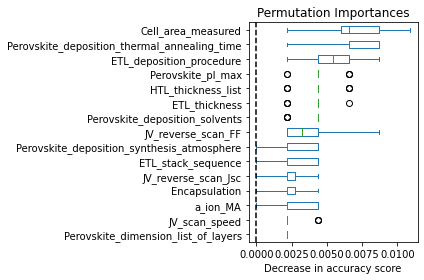

In [64]:
from sklearn.preprocessing import LabelEncoder

df_rf = df_.copy()

le=LabelEncoder()
df_rf[obj]=df_rf[obj].apply(le.fit_transform)
df_rf[obj]= df_rf[obj].astype('category')


X = df_rf.iloc[:,:-3]
y= df_rf["Target_top10"]

X_arr=np.array(X)
y_arr=np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.25, stratify=y_arr, random_state=random_state)

params = {'n_estimators' : [100,300,500]
           ,'min_samples_leaf' : [1,3,5]
            ,'max_depth' : [15,20,25]
            ,'min_samples_split' : [2,5,8]
            }

rfc = RandomForestClassifier(random_state = random_state)
clf_rfc = GridSearchCV(rfc, params, cv=5, n_jobs=-1, scoring = 'accuracy')
clf_rfc = run_model(clf_rfc, X_train, X_test, y_train, y_test, type(rfc).__name__)

print("최적 파라미터 :", clf_rfc.best_params_)

#### 3. With Label Encoding and Oversampling

In [65]:
smote = SMOTE(random_state=random_state)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

---------------- 모델:  RandomForestClassifier ----------------
최고 f1-score = 0.341700, 임계치 = 0.150000
[34 14] [117 294]
Precision     : 0.2252
Recall        : 0.7083
roc_auc_score : 0.7631
PR score      : 0.3668

최적 파라미터 : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


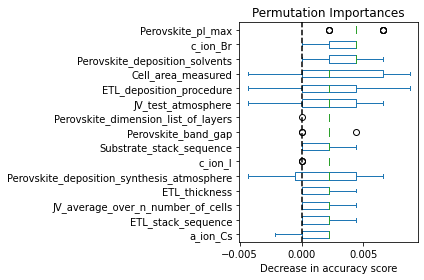

In [66]:
rfc = RandomForestClassifier(random_state = random_state)
clf_rfc_re = GridSearchCV(rfc, params, cv=5, n_jobs=-1, scoring = 'accuracy')
clf_rfc_re = run_model(clf_rfc_re, X_train_res, X_test, y_train_res, y_test, type(rfc).__name__)

print("최적 파라미터 :", clf_rfc_re.best_params_)

# 3.3 LGBM

In [67]:
from lightgbm import LGBMClassifier, LGBMRegressor

#### 1. Without Label Encoding

---------------- 모델:  LGBMClassifier ----------------
최고 f1-score = 0.373500, 임계치 = 0.080000
[31 17] [ 87 324]
Precision     : 0.2627
Recall        : 0.6458
roc_auc_score : 0.7771
PR score      : 0.3446

최적 파라미터 : {'learning_rate': 0.05, 'max_depth': 7, 'num_leaves': 63}


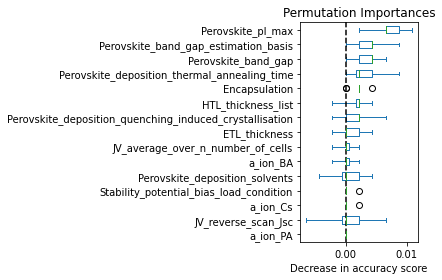

In [68]:
df_lg = df_.copy()
df_lg[obj]= df_lg[obj].astype('category')

X_no_encoding = df_lg.iloc[:,:-3]
y_no_encoding= df_lg["Target_top10"]


# label encoding 미적용
X_train, X_test, y_train, y_test = train_test_split(X_no_encoding, y_no_encoding, test_size=0.25, stratify=y_no_encoding, random_state=random_state)
params = {'num_leaves' : [31,63,127,255]
         #,'min_child_samples' : [5,10,15]
         ,'max_depth' : [5,6,7,8]
         ,'learning_rate' : [0.01, 0.25, 0.05, 1]
         #,'reg_alpha' : [0, 0.01, 0.03]
         }
lgbm = LGBMClassifier(random_state = random_state)
clf_lg = GridSearchCV(lgbm, params, cv=5, n_jobs=-1, scoring = 'accuracy')
clf_lg = run_model(clf_lg, X_train, X_test, y_train, y_test, type(lgbm).__name__)
print("최적 파라미터 :", clf_lg.best_params_)

#### 2. With Label Encoding

---------------- 모델:  LGBMClassifier ----------------
최고 f1-score = 0.375000, 임계치 = 0.090000
[33 15] [ 95 316]
Precision     : 0.2578
Recall        : 0.6875
roc_auc_score : 0.7844
PR score      : 0.3162

최적 파라미터 : {'learning_rate': 0.05, 'max_depth': 5, 'num_leaves': 31}


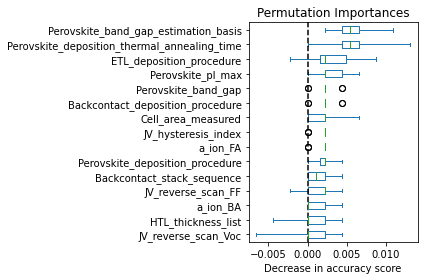

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.25, stratify=y_arr, random_state=random_state)

params = {'num_leaves' : [31,63,127,255]
         #,'min_child_samples' : [5,10,15]
         ,'max_depth' : [5,6,7,8]
         ,'learning_rate' : [0.01, 0.25, 0.05, 1]
         #,'reg_alpha' : [0, 0.01, 0.03]
         }

lgbm = LGBMClassifier(random_state = random_state)
clf_lg_en = GridSearchCV(lgbm, params, cv=5, n_jobs=-1, scoring = 'accuracy')
clf_lg_en = run_model(clf_lg_en, X_train, X_test, y_train, y_test, type(lgbm).__name__)

print("최적 파라미터 :", clf_lg_en.best_params_)

#### 3. Label Encoding + OverSampling

---------------- 모델:  LGBMClassifier ----------------
최고 f1-score = 0.330800, 임계치 = 0.030000
[22 26] [ 63 348]
Precision     : 0.2588
Recall        : 0.4583
roc_auc_score : 0.7599
PR score      : 0.3706

최적 파라미터 : {'learning_rate': 0.25, 'max_depth': 6, 'num_leaves': 63}


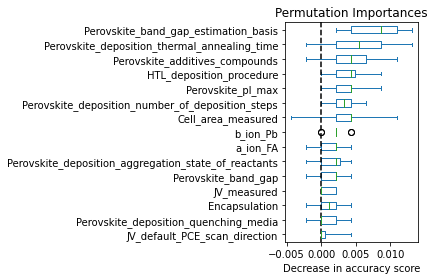

In [70]:
# label encoding 적용 → smote oversampling 수행

lgbm = LGBMClassifier(random_state = random_state)
clf_lg_re = GridSearchCV(lgbm, params, cv=5, n_jobs=-1, scoring = 'accuracy')
clf_lg_re = run_model(clf_lg_re, X_train_res, X_test, y_train_res, y_test, type(lgbm).__name__)

print("최적 파라미터 :", clf_lg_re.best_params_)

# 4. T80예측

## 4.1 데이터 전처리

In [71]:
df = pd.read_csv("./Perovskite_database_content_all_data.csv")
df_pred = df.loc[df["Stability_PCE_T80"].isnull()][valid_col]
df_pred.reset_index(inplace=True, drop=True)

print(df_pred.shape)

(40609, 60)


In [72]:
# del df_processed

col_delimiter = ['Perovskite_deposition_thermal_annealing_time']

for col in col_delimiter:
    df_pred[col] = [str(i).replace('; ', ' >> ').replace('|', ' >> ')  for i in df_pred[col]]
    df_pred[col] = df_pred[col].replace('Unknown', np.nan)
    df_pred[col] = [np.median([float(j) for j in i.split(' >> ') if 'Unknown' not in j]) if type(i)==str else float(i) for i in df_pred[col]]
    df_pred[col].fillna(value=df_pred[col].median(), inplace=True)

print(df_pred.shape)

(40609, 60)


In [73]:
layer_list = ['Perovskite_dimension_list_of_layers']

for i in layer_list:
    mode = df_pred[i].mode().values[0]
    df_pred[i].fillna(mode, inplace=True) 
    df_pred[i] = df_pred[i].apply(lambda x: x[:3] if '|' in str(x) else x)
    df_pred[i] = df_pred[i].astype(float)

print(df_pred.shape)

# print(df_pred['Perovskite_dimension_list_of_layers'].tolist())

(40609, 60)


In [74]:
thickness_list = ['Backcontact_thickness_list', 'HTL_thickness_list', 'ETL_thickness', 'Perovskite_thickness']

for col in thickness_list:
    df_pred[col] = df_pred[col].replace('uknnown', np.nan).replace('True', np.nan).replace('unkown', np.nan)      
    df_pred[col] = [i if '-' not in str(i) else np.mean([float(j) for j in str(i).split('-')]) for i in df_pred[col]]
    df_pred[col] = [sum([float(j) if not np.isnan(float(j)) else 0 for j in i.split('|')]) if type(i)==str else float(i) for i in df_pred[col]]
    df_pred[col].fillna(value=df_pred[col].median(), inplace=True)
    
print(df_pred.shape)
# print(df_pred['Backcontact_thickness_list'].tolist())

(40609, 60)


In [75]:
# Top n개 유지

for col in unique_dict.keys():
    df_pred[col] = [i if i in unique_dict[col] else 'etc' for i in df_pred[col]]
    
print(df_pred.shape)

(40609, 60)


In [76]:
# 재분류 수행

# Stability_potential_bias_load_condition: 재분류(Open circuit인것과 아닌것)
df_pred.loc[df_pred["Stability_potential_bias_load_condition"] != "Open circuit", "Stability_potential_bias_load_condition"] = "not Open circuit"


# HTL_stack_sequence : 재분류(spiro-MeOTAD 포함된 것 / 포함 안된것)
df_pred.loc[~df_pred["HTL_stack_sequence"].str.contains("Spiro-MeOTAD", case=True, regex=False), "HTL_stack_sequence"] = "no-Spiro-MeOTAD"
df_pred.loc[df_pred["HTL_stack_sequence"] != "no-Spiro-MeOTAD", "HTL_stack_sequence"] = "Spiro-MeOTAD"

# Perovskite_additives_compounds : 재분류(Unknown/ Undoped(도핑안한것) /(도핑한것))
df_pred["Perovskite_additives_compounds"].fillna("Unknown", inplace=True)
df_pred.loc[(df_pred["Perovskite_additives_compounds"] != "Unknown") & (df_pred["Perovskite_additives_compounds"] != "Undoped"), "Perovskite_additives_compounds"] = "Doped"

print(df_pred.shape)

(40609, 60)


In [77]:
print(ion_cols)
from tqdm import tqdm

df_work = df_pred.copy()[ion_cols]


ion_map_dfs = []
for ion in tqdm(ions_list):
    df_temp = []
    for j in ion:
        df_temp.append(deep_auto_split(df_work, j))
    ion_map_dfs.append(create_mapped_df(*df_temp).add_prefix(ion[0].split('_')[2]+"_ion_"))

df_ion_map_ = pd.concat(ion_map_dfs, axis=1)


['Perovskite_composition_a_ions', 'Perovskite_composition_a_ions_coefficients', 'Perovskite_composition_b_ions', 'Perovskite_composition_b_ions_coefficients', 'Perovskite_composition_c_ions', 'Perovskite_composition_c_ions_coefficients']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:26<00:00, 48.97s/it]


In [78]:
# df_ion_map__ = df_ion_map_.apply(lambda x: float(x[0].replace(',', ''))
df_ion_map_ = df_ion_map_.replace(r'^\s*$', np.nan, regex=True)
df_ion_map_ = df_ion_map_.fillna(0).replace(r'x', 0, regex=True).astype('float64') #there are 'x's for some reason

print(df_ion_map_.shape)

(40609, 179)


In [79]:
print(df_ion_map_.shape)
df_ion_map_ = df_ion_map_[[i for i in ion_map_col if i in df_ion_map_.columns]]


for i in ['a_ion_(EU-pyP)', 'a_ion_(BYA)', 'a_ion_BE', 'a_ion_PMA', 'a_ion_Aa']:
    if i not in df_ion_map_.columns:
        df_ion_map_[i] = 0

        
df_ion_map_ = df_ion_map_[ion_map_col]
print(df_ion_map_.shape)

(40609, 179)
(40609, 47)


In [80]:
try:
    df_pred = df_pred.drop(columns=ion_cols, axis=1)
except KeyError:
    pass
else:
    df_pred = pd.concat([df_pred, df_ion_map_], axis=1)

print(df_pred.shape)

(40609, 101)


In [81]:
numeric_with_nan = ['Perovskite_band_gap', 'Perovskite_pl_max', 'Cell_area_measured', 'JV_scan_speed', 'JV_reverse_scan_Voc', 
                    'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF', 'JV_hysteresis_index', 'Stability_PCE_initial_value']

for i in numeric_with_nan:

    df_pred[i] = [str(i).replace('; ', '|') for i in df_pred[i]]
    df_pred[i] = [sum([float(j) for j in str(i).split('|')]) for i in df_pred[i]]
    df_pred[i] = df_pred[i].astype(float)
    df_pred[i].fillna(value=df_pred[i].median(), inplace=True)

print(df_pred.shape)

(40609, 101)


In [82]:
delete_list = ['Perovskite_composition_long_form', 
               'Stability_time_total_exposure', 
               'Stability_PCE_end_of_experiment',
               'Stability_light_intensity',
               'Stability_relative_humidity_average_value',
               'Stability_protocol',
               'Stability_light_source_type',
               'Stability_PCE_burn_in_observed', 
               'EQE_measured', 
               'Stability_PCE_initial_value',
               'Stability_PCE_T80']
for i in delete_list:
    try:
        df_pred = df_pred.drop(columns=i, axis=1)
    except KeyError:
        continue


print(df_pred.shape)

(40609, 90)


## 4.2 LGBM & RF 모델 활용한 T80 예측

In [83]:
df_pred_ = df_pred.copy()
df_pred_results = df_pred.copy()

obj=[]
for i in df_pred_.columns:
    if df_pred[i].dtypes == "object":
        obj.append(i)

le=LabelEncoder()
df_pred_[obj]=df_pred_[obj].apply(le.fit_transform)
df_pred_[obj]= df_pred_[obj].astype('category')


model_ = clf_rfc # rfc_model, lgbm_model
model_predict = model_.predict(df_pred_)
model_predict_proba = model_.predict_proba(df_pred_)[:,1]
df_pred_results['model_predict_RandomForest'] = model_predict
df_pred_results['model_predict_proba_RandomForest'] = model_predict_proba

model_ = clf_lg_en # rfc_model, lgbm_model
model_predict = model_.predict(df_pred_)
model_predict_proba = model_.predict_proba(df_pred_)[:,1]
df_pred_results['model_predict_lgbm'] = model_predict
df_pred_results['model_predict_proba_lgbm'] = model_predict_proba

print(df_pred_results['model_predict_RandomForest'].value_counts())
print(df_pred_results['model_predict_lgbm'].value_counts())

0.0    40070
1.0      539
Name: model_predict_RandomForest, dtype: int64
0.0    39677
1.0      932
Name: model_predict_lgbm, dtype: int64


In [84]:
file_name = "processed_pred_v3.csv"

df_pred_results.to_csv(file_name, index=False)
os.startfile(file_name)